# ex_diabets

## 0. 連接雲端硬碟，起始準備

In [3]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

# 移到資料夾
%cd /content/drive/MyDrive/class_AI/ex_diabetes/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/class_AI/ex_diabetes
/content/drive/MyDrive/class_AI/ex_diabetes
1_MLP_logistic_regression.ipynb  2_MLP_better.ipynb  diabetes.csv


In [ ]:
#上傳圖片方法複習
from google.colab import files
uploaded = files.upload()

In [ ]:
!wget 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'

## 1. MLP 模型 - Logistic Regression

In [4]:
# 匯入套件模組
import tensorflow
print(tensorflow.__version__)

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical


2.15.0


In [5]:
# 讀取資料集 - 載入糖尿病資料集
# df = pd.read_csv('./diabetes.csv')
df = pd.read_csv('./diabetes.csv', encoding='utf8', engine='python')
dataset = df.values


In [6]:
# 訓練資料準備
np.random.seed(10)  # 指定亂數種子
np.random.shuffle(dataset)  # 使用亂數打亂資料

# 分割成輸入的訓練資料和標籤資料
x_train = dataset[:, 0:8]
y_train = dataset[:, 8]

# 特徵標準化
x_train -= x_train.mean(axis=0)
x_train /= x_train.std(axis=0)

# One-hot編碼
y_train = to_categorical(y_train)


In [7]:
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
      kernel_initializer='random_uniform',
      bias_initializer='ones',
      activation='relu'))
model.add(Dense(8, kernel_initializer='random_uniform',
      bias_initializer='ones',
      activation='relu'))
model.add(Dense(2, kernel_initializer='random_uniform',
      bias_initializer='ones',
      activation='softmax'))

model.summary()  # 顯示模型摘要資訊

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 196 (784.00 Byte)
Trainable params: 196 (784.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 訓練模型
history = model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=0)


In [9]:
print(history.history)
print(history.history.keys())


{'loss': [0.8077120780944824, 0.7449751496315002, 0.7041922211647034, 0.6788506507873535, 0.6640901565551758, 0.6558476090431213, 0.6515934467315674, 0.6492040157318115, 0.6480264663696289, 0.6476091146469116, 0.6471601724624634, 0.6470015645027161, 0.6468999981880188, 0.6468856334686279, 0.6468652486801147, 0.6468042731285095, 0.6468718647956848, 0.6469506621360779, 0.646766185760498, 0.6468822360038757, 0.6466995477676392, 0.6468119025230408, 0.6468023657798767, 0.6466616988182068, 0.6466538310050964, 0.6465734839439392, 0.6466586589813232, 0.6465705633163452, 0.6465507745742798, 0.6465515494346619, 0.646539568901062, 0.6465210914611816, 0.646515429019928, 0.6464306712150574, 0.6464978456497192, 0.6463962197303772, 0.646500825881958, 0.6463446021080017, 0.6463778614997864, 0.6463378667831421, 0.6462227702140808, 0.6462578773498535, 0.6461998224258423, 0.6461746692657471, 0.6461237072944641, 0.6460767388343811, 0.6460853815078735, 0.6460427641868591, 0.6460347175598145, 0.646037399768

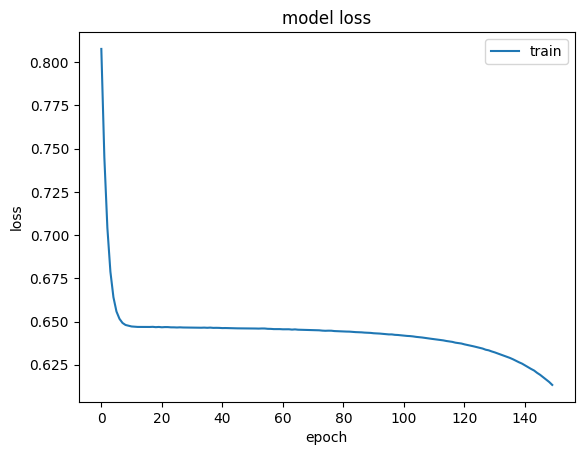

In [10]:
# 顯示 lose 變化
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [11]:
# 評估模型
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('準確度 = {:.2f}'.format(accuracy))


準確度 = 0.65


## 完整的程式

In [ ]:
# 匯入套件模組
import tensorflow
print(tensorflow.__version__)

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 讀取資料集 - 載入糖尿病資料集
df = pd.read_csv('./diabetes.csv')
dataset = df.values

# 訓練資料準備
np.random.seed(10)  # 指定亂數種子
np.random.shuffle(dataset)  # 使用亂數打亂資料

# 分割成輸入的訓練資料和標籤資料
x_train = dataset[:, 0:8]
y_train = dataset[:, 8]

# 特徵標準化
x_train -= x_train.mean(axis=0)
x_train /= x_train.std(axis=0)

# One-hot編碼
y_train = to_categorical(y_train)

# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
      kernel_initializer='random_uniform',
      bias_initializer='ones',
      activation='relu'))
model.add(Dense(8, kernel_initializer='random_uniform',
      bias_initializer='ones',
      activation='relu'))
model.add(Dense(2, kernel_initializer='random_uniform',
      bias_initializer='ones',
      activation='softmax'))

model.summary()  # 顯示模型摘要資訊

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
model.fit(x_train, y_train, epochs=150, batch_size=32, verbose=0)

# 評估模型
loss, accuracy = model.evaluate(x_train, y_train, verbose=0)
print('準確度 = {:.2f}'.format(accuracy))
